In [1]:
import numpy as np 
import pandas as pd 
import os
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pathlib
import random
import time
from sklearn.model_selection import train_test_split


def get_path_image(folder):
    image_paths = []
    image_fnames = os.listdir(folder) 
    for img_id in range(len(image_fnames)):
        img = os.path.join(folder,image_fnames[img_id])
        image_paths.append(img)
    
    return image_paths


In [2]:
typeDataset = "Whole"
all_0 = "/Users/daniel/desktop/Paper/LeukemiaClassification/archive/fold_0/all"
all_1 = "/Users/daniel/desktop/Paper/LeukemiaClassification/archive/fold_1/all"
all_2 = "/Users/daniel/desktop/Paper/LeukemiaClassification/archive/fold_2/all"

hem_0 = "/Users/daniel/desktop/Paper/LeukemiaClassification/archive/fold_0/hem"
hem_1 = "/Users/daniel/desktop/Paper/LeukemiaClassification/archive/fold_1/hem"
hem_2 = "/Users/daniel/desktop/Paper/LeukemiaClassification/archive/fold_2/hem"
def get_path_image(folder):
    image_paths = []
    image_fnames = os.listdir(folder) 
    for img_id in range(len(image_fnames)):
        img = os.path.join(folder,image_fnames[img_id])
        image_paths.append(img)
    
    return image_paths
img_data = []

for i in [all_0,all_1,all_2,hem_0,hem_1,hem_2]:
    paths = get_path_image(i)
    img_data.extend(paths)
print(len(img_data))

10661


/var/folders/3j/yqk0l1vx0zjg8h8r57fdkn_00000gn/T/ipykernel_6155/3959660044.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["labels"][0:7272] = 1 # ALL
/var/folders/3j/yqk0l1vx0zjg8h8r57fdkn_00000gn/T/ipykernel_6155/3959660044.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["labels"][7272:10661] = 0 # HEM


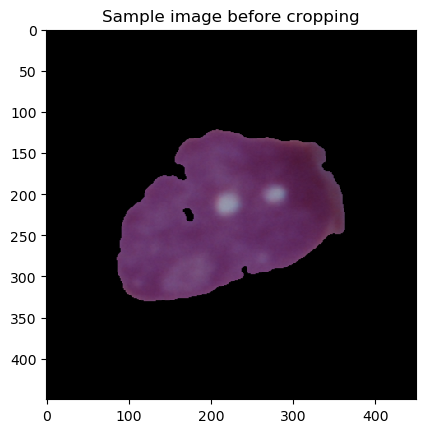

'\ndata = {"img_data":img_data,\n        "labels":[np.nan for x in range(len(img_data))]}\n\ndata = pd.DataFrame(data) \ndata["labels"][0:1455] = 1 # ALL\ndata["labels"][1455:2134] = 0 # HEM\ndata["labels"] = data["labels"].astype("int64")\nimage = cv.imread(data["img_data"][1000])\nplt.imshow(image)\nplt.title("Sample image before cropping")\nplt.show()\n'

In [3]:

data = {"img_data":img_data,
        "labels":[np.nan for x in range(len(img_data))]}

data = pd.DataFrame(data) 
data["labels"][0:7272] = 1 # ALL
data["labels"][7272:10661] = 0 # HEM
data["labels"] = data["labels"].astype("int64")
image = cv.imread(data["img_data"][1000])
plt.imshow(image)
plt.title("Sample image before cropping")
plt.show()
"""
data = {"img_data":img_data,
        "labels":[np.nan for x in range(len(img_data))]}

data = pd.DataFrame(data) 
data["labels"][0:1455] = 1 # ALL
data["labels"][1455:2134] = 0 # HEM
data["labels"] = data["labels"].astype("int64")
image = cv.imread(data["img_data"][1000])
plt.imshow(image)
plt.title("Sample image before cropping")
plt.show()
"""

In [4]:
img_list = []
for i in range(len(img_data)):
    image = cv.imread(data["img_data"][i])
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]

    result = cv.bitwise_and(image, image, mask=thresh)
    result[thresh==0] = [255,255,255] 
    (x, y, z_) = np.where(result > 0)
    mnx = (np.min(x))
    mxx = (np.max(x))
    mny = (np.min(y))
    mxy = (np.max(y))
    crop_img = image[mnx:mxx,mny:mxy,:]
    crop_img_r = cv.resize(crop_img, (224,224))
    img_list.append(crop_img_r)

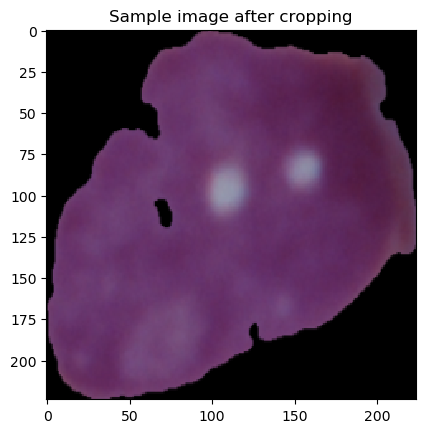

In [5]:
plt.imshow(img_list[1000])
plt.title("Sample image after cropping")
plt.show()

In [6]:
from tensorflow.keras.applications.efficientnet import preprocess_input

from tensorflow.keras.applications import ResNet50, ResNet101
from keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201, DenseNet121

In [7]:
def feature_extract(model):
    if model == "VGG19":
        model = VGG19(weights='imagenet', include_top=False, pooling="avg")
    elif model == "ResNet50":
        model = ResNet50(weights='imagenet', include_top=False, pooling="avg")
    elif model == "ResNet101":
        model = ResNet101(weights='imagenet', include_top=False, pooling="avg")
    elif model == "EfficientNetB0":
        model = EfficientNetB0(weights='imagenet', include_top=False, pooling="avg")
    elif model == "EfficientNetB3":
        model = EfficientNetB3(weights='imagenet', include_top=False, pooling="avg")
    elif model == "DenseNet121":
        model = DenseNet121(weights='imagenet', include_top=False, pooling="avg")
    elif model == "DenseNet201":
        model = DenseNet201(weights='imagenet', include_top=False, pooling="avg")
    return model

In [8]:
model = feature_extract("DenseNet201") 
modelChie = "DenseNet201"
#make loaded layer as non trainable
for layer in model.layers:
        layer.trainable=False
model.summary()

2024-02-10 19:19:52.342721: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-10 19:19:52.342833: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro
Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d[0][0]']         
                                64)                   

                                                                                                  
 conv2_block3_concat (Concatena  (None, None, None,   0          ['conv2_block2_concat[0][0]',    
 te)                            160)                              'conv2_block3_2_conv[0][0]']    
                                                                                                  
 conv2_block4_0_bn (BatchNormal  (None, None, None,   640        ['conv2_block3_concat[0][0]']    
 ization)                       160)                                                              
                                                                                                  
 conv2_block4_0_relu (Activatio  (None, None, None,   0          ['conv2_block4_0_bn[0][0]']      
 n)                             160)                                                              
                                                                                                  
 conv2_blo

 n)                             128)                                                              
                                                                                                  
 conv3_block1_1_conv (Conv2D)   (None, None, None,   16384       ['conv3_block1_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv3_block1_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block1_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block1_1_relu (Activatio  (None, None, None,   0          ['conv3_block1_1_bn[0][0]']      
 n)                             128)                                                              
          

 conv3_block5_0_relu (Activatio  (None, None, None,   0          ['conv3_block5_0_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv3_block5_1_conv (Conv2D)   (None, None, None,   32768       ['conv3_block5_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv3_block5_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block5_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block5_1_relu (Activatio  (None, None, None,   0          ['conv3_block5_1_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block9_0_relu (Activatio  (None, None, None,   0          ['conv3_block9_0_bn[0][0]']      
 n)                             384)                                                              
                                                                                                  
 conv3_block9_1_conv (Conv2D)   (None, None, None,   49152       ['conv3_block9_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv3_block9_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block9_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_blo

                                512)                                                              
                                                                                                  
 pool3_relu (Activation)        (None, None, None,   0           ['pool3_bn[0][0]']               
                                512)                                                              
                                                                                                  
 pool3_conv (Conv2D)            (None, None, None,   131072      ['pool3_relu[0][0]']             
                                256)                                                              
                                                                                                  
 pool3_pool (AveragePooling2D)  (None, None, None,   0           ['pool3_conv[0][0]']             
                                256)                                                              
          

 conv4_block4_1_bn (BatchNormal  (None, None, None,   512        ['conv4_block4_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv4_block4_1_relu (Activatio  (None, None, None,   0          ['conv4_block4_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv4_block4_2_conv (Conv2D)   (None, None, None,   36864       ['conv4_block4_1_relu[0][0]']    
                                32)                                                               
                                                                                                  
 conv4_block4_concat (Concatena  (None, None, None,   0          ['conv4_block3_concat[0][0]',    
 te)      

                                                                                                  
 conv4_block8_1_bn (BatchNormal  (None, None, None,   512        ['conv4_block8_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv4_block8_1_relu (Activatio  (None, None, None,   0          ['conv4_block8_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv4_block8_2_conv (Conv2D)   (None, None, None,   36864       ['conv4_block8_1_relu[0][0]']    
                                32)                                                               
                                                                                                  
 conv4_blo

                                128)                                                              
                                                                                                  
 conv4_block12_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block12_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block12_1_relu (Activati  (None, None, None,   0          ['conv4_block12_1_bn[0][0]']     
 on)                            128)                                                              
                                                                                                  
 conv4_block12_2_conv (Conv2D)  (None, None, None,   36864       ['conv4_block12_1_relu[0][0]']   
                                32)                                                               
          

 conv4_block16_1_conv (Conv2D)  (None, None, None,   94208       ['conv4_block16_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block16_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block16_1_relu (Activati  (None, None, None,   0          ['conv4_block16_1_bn[0][0]']     
 on)                            128)                                                              
                                                                                                  
 conv4_block16_2_conv (Conv2D)  (None, None, None,   36864       ['conv4_block16_1_relu[0][0]']   
          

                                                                                                  
 conv4_block20_1_conv (Conv2D)  (None, None, None,   110592      ['conv4_block20_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block20_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block20_1_relu (Activati  (None, None, None,   0          ['conv4_block20_1_bn[0][0]']     
 on)                            128)                                                              
                                                                                                  
 conv4_blo

 on)                            992)                                                              
                                                                                                  
 conv4_block24_1_conv (Conv2D)  (None, None, None,   126976      ['conv4_block24_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block24_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block24_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block24_1_relu (Activati  (None, None, None,   0          ['conv4_block24_1_bn[0][0]']     
 on)                            128)                                                              
          

 conv4_block28_0_relu (Activati  (None, None, None,   0          ['conv4_block28_0_bn[0][0]']     
 on)                            1120)                                                             
                                                                                                  
 conv4_block28_1_conv (Conv2D)  (None, None, None,   143360      ['conv4_block28_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block28_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block28_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block28_1_relu (Activati  (None, None, None,   0          ['conv4_block28_1_bn[0][0]']     
 on)      

                                                                                                  
 conv4_block32_0_relu (Activati  (None, None, None,   0          ['conv4_block32_0_bn[0][0]']     
 on)                            1248)                                                             
                                                                                                  
 conv4_block32_1_conv (Conv2D)  (None, None, None,   159744      ['conv4_block32_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block32_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block32_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_blo

 lization)                      1376)                                                             
                                                                                                  
 conv4_block36_0_relu (Activati  (None, None, None,   0          ['conv4_block36_0_bn[0][0]']     
 on)                            1376)                                                             
                                                                                                  
 conv4_block36_1_conv (Conv2D)  (None, None, None,   176128      ['conv4_block36_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block36_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block36_1_conv[0][0]']   
 lization)                      128)                                                              
          

 conv4_block40_0_bn (BatchNorma  (None, None, None,   6016       ['conv4_block39_concat[0][0]']   
 lization)                      1504)                                                             
                                                                                                  
 conv4_block40_0_relu (Activati  (None, None, None,   0          ['conv4_block40_0_bn[0][0]']     
 on)                            1504)                                                             
                                                                                                  
 conv4_block40_1_conv (Conv2D)  (None, None, None,   192512      ['conv4_block40_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block40_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block40_1_conv[0][0]']   
 lization)

                                                                                                  
 conv4_block44_0_bn (BatchNorma  (None, None, None,   6528       ['conv4_block43_concat[0][0]']   
 lization)                      1632)                                                             
                                                                                                  
 conv4_block44_0_relu (Activati  (None, None, None,   0          ['conv4_block44_0_bn[0][0]']     
 on)                            1632)                                                             
                                                                                                  
 conv4_block44_1_conv (Conv2D)  (None, None, None,   208896      ['conv4_block44_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_blo

 ate)                           1760)                             'conv4_block47_2_conv[0][0]']   
                                                                                                  
 conv4_block48_0_bn (BatchNorma  (None, None, None,   7040       ['conv4_block47_concat[0][0]']   
 lization)                      1760)                                                             
                                                                                                  
 conv4_block48_0_relu (Activati  (None, None, None,   0          ['conv4_block48_0_bn[0][0]']     
 on)                            1760)                                                             
                                                                                                  
 conv4_block48_1_conv (Conv2D)  (None, None, None,   225280      ['conv4_block48_0_relu[0][0]']   
                                128)                                                              
          

 conv5_block3_1_conv (Conv2D)   (None, None, None,   122880      ['conv5_block3_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, None, None,   512        ['conv5_block3_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv5_block3_1_relu (Activatio  (None, None, None,   0          ['conv5_block3_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, None, None,   36864       ['conv5_block3_1_relu[0][0]']    
          

                                                                                                  
 conv5_block7_1_conv (Conv2D)   (None, None, None,   139264      ['conv5_block7_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv5_block7_1_bn (BatchNormal  (None, None, None,   512        ['conv5_block7_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv5_block7_1_relu (Activatio  (None, None, None,   0          ['conv5_block7_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv5_blo

 on)                            1216)                                                             
                                                                                                  
 conv5_block11_1_conv (Conv2D)  (None, None, None,   155648      ['conv5_block11_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_block11_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block11_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv5_block11_1_relu (Activati  (None, None, None,   0          ['conv5_block11_1_bn[0][0]']     
 on)                            128)                                                              
          

 conv5_block15_0_relu (Activati  (None, None, None,   0          ['conv5_block15_0_bn[0][0]']     
 on)                            1344)                                                             
                                                                                                  
 conv5_block15_1_conv (Conv2D)  (None, None, None,   172032      ['conv5_block15_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_block15_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block15_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv5_block15_1_relu (Activati  (None, None, None,   0          ['conv5_block15_1_bn[0][0]']     
 on)      

                                                                                                  
 conv5_block19_0_relu (Activati  (None, None, None,   0          ['conv5_block19_0_bn[0][0]']     
 on)                            1472)                                                             
                                                                                                  
 conv5_block19_1_conv (Conv2D)  (None, None, None,   188416      ['conv5_block19_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_block19_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block19_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv5_blo

 lization)                      1600)                                                             
                                                                                                  
 conv5_block23_0_relu (Activati  (None, None, None,   0          ['conv5_block23_0_bn[0][0]']     
 on)                            1600)                                                             
                                                                                                  
 conv5_block23_1_conv (Conv2D)  (None, None, None,   204800      ['conv5_block23_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_block23_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block23_1_conv[0][0]']   
 lization)                      128)                                                              
          

 conv5_block27_0_bn (BatchNorma  (None, None, None,   6912       ['conv5_block26_concat[0][0]']   
 lization)                      1728)                                                             
                                                                                                  
 conv5_block27_0_relu (Activati  (None, None, None,   0          ['conv5_block27_0_bn[0][0]']     
 on)                            1728)                                                             
                                                                                                  
 conv5_block27_1_conv (Conv2D)  (None, None, None,   221184      ['conv5_block27_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_block27_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block27_1_conv[0][0]']   
 lization)

                                                                                                  
 conv5_block31_0_bn (BatchNorma  (None, None, None,   7424       ['conv5_block30_concat[0][0]']   
 lization)                      1856)                                                             
                                                                                                  
 conv5_block31_0_relu (Activati  (None, None, None,   0          ['conv5_block31_0_bn[0][0]']     
 on)                            1856)                                                             
                                                                                                  
 conv5_block31_1_conv (Conv2D)  (None, None, None,   237568      ['conv5_block31_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_blo

In [9]:
features_list = []
print(len(img_list))
for i in range(len(img_list)):
    image = img_list[i].reshape(-1, 224, 224, 3)
    image = preprocess_input(image)
    features = model.predict(image).reshape(-1,)
    features_list.append(features)


features_array = np.array(features_list)

10661


2024-02-10 19:19:57.266054: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-02-10 19:19:57.993218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 64ms/step


In [10]:
"""
features_listModel2 = []

model2 = feature_extract("DarkNet53")

for i in range(len(img_list)):
    imageModel2 = img_list[i].reshape(-1, 416, 416, 3)  # DarkNet-53 input shape is typically 416x416
    imageModel2 = preprocess_input(imageModel2)
    featuresModel2 = model2.predict(imageModel2)
    featuresModel2 = featuresModel2.reshape(-1,)  # Reshape to a 1D array
    features_listModel2.append(featuresModel2)
features_arrayModel2 = np.array(features_listModel2)

features_df2 = pd.DataFrame(features_arrayModel2)
features_df2["labels"] = data["labels"]
x2 = features_df2.drop(['labels'], axis = 1)
y2 = features_df2.loc[:,"labels"].values
"""

'\nfeatures_listModel2 = []\n\nmodel2 = feature_extract("DarkNet53")\n\nfor i in range(len(img_list)):\n    imageModel2 = img_list[i].reshape(-1, 416, 416, 3)  # DarkNet-53 input shape is typically 416x416\n    imageModel2 = preprocess_input(imageModel2)\n    featuresModel2 = model2.predict(imageModel2)\n    featuresModel2 = featuresModel2.reshape(-1,)  # Reshape to a 1D array\n    features_listModel2.append(featuresModel2)\nfeatures_arrayModel2 = np.array(features_listModel2)\n\nfeatures_df2 = pd.DataFrame(features_arrayModel2)\nfeatures_df2["labels"] = data["labels"]\nx2 = features_df2.drop([\'labels\'], axis = 1)\ny2 = features_df2.loc[:,"labels"].values\n'

In [11]:
features_df = pd.DataFrame(features_array)
features_df["labels"] = data["labels"]
x = features_df.drop(['labels'], axis = 1)
y = features_df.loc[:,"labels"].values

In [12]:
print(f"Number of features before feature selection: {x.shape[1]}")

Number of features before feature selection: 1920


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x_ = scaler.transform(x)

In [14]:
x_ = pd.DataFrame(x_)

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif  # Import necessary libraries
from sklearn.feature_selection import SelectKBest, mutual_info_classif

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [16]:
def anova_fs(x, y):
    
    selector = SelectKBest(f_classif, k=512) # k is number of features
    selector.fit(x, y)

    cols = selector.get_support(indices=True)
    anova_x = x_[cols]
    return anova_x

def RFE_fs(x, y):
    rfe_selector = RFE(estimator=RandomForestClassifier())
    rfe_selector.fit(x, y)
    
    rfe_support = rfe_selector.get_support()
    rfe_feature = x_.loc[:,rfe_support].columns.tolist()
    
    rfe_x = x_[rfe_feature]
    return rfe_x


def rf_fs(x, y):
    embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=256, random_state=5), threshold='1.25*median')
    embeded_rf_selector.fit(x_, y)
    
    embeded_rf_support = embeded_rf_selector.get_support()
    embeded_rf_feature = x.loc[:,embeded_rf_support].columns.tolist()
    
    rf_x = x[embeded_rf_feature]
    return rf_x

#Univariate Feature Selection
def univariate_fs(x, y, k):
    selector = SelectKBest(score_func=f_classif, k=k)  # Using ANOVA F-value for scoring
    selector.fit(x, y)
    
    selected_indices = selector.get_support()
    selected_features = x.columns[selected_indices]
    
    x_selected = x[selected_features]
    return x_selected

#Mutual Information
def mi_fs(x, y, k):
    # Calculate mutual information scores for each feature
    mi_scores = mutual_info_classif(x, y)
    
    # Select the top k features based on mutual information scores
    k_best_selector = SelectKBest(score_func=mutual_info_classif, k=k)
    k_best_selector.fit(x, y)
    
    # Get the indices of selected features
    selected_indices = k_best_selector.get_support(indices=True)
    
    # Extract the selected feature names
    selected_feature_names = x.columns[selected_indices].tolist()
    
    # Extract the selected features from the input data
    selected_x = x[selected_feature_names]
    
    return selected_x


def lasso_fs(x, y):
    lasso_selector = SelectFromModel(Lasso(alpha=0.1), threshold='1.25*median')
    lasso_selector.fit(x, y)
    
    lasso_support = lasso_selector.get_support()
    lasso_feature = x.loc[:, lasso_support].columns.tolist()
    
    lasso_x = x[lasso_feature]
    return lasso_x


def xgb_fs(x, y):
    embeded_xgb_selector = SelectFromModel(XGBClassifier(n_estimators=200, random_state=5), threshold='1.25*median')
    embeded_xgb_selector.fit(x, y)
    
    embeded_xgb_support = embeded_xgb_selector.get_support()
    embeded_xgb_feature = x.loc[:, embeded_xgb_support].columns.tolist()
    
    xgb_x = x[embeded_xgb_feature]
    return xgb_x

def variance_threshold_fs(x):
    # Create a VarianceThreshold instance with a specific threshold (adjust as needed)
    variance_selector = VarianceThreshold(threshold=0.01)
    
    # Fit the VarianceThreshold selector on the data
    variance_selector.fit(x)
    
    # Get the support mask for selected features
    variance_support = variance_selector.get_support()
    
    # Get the selected feature indices
    selected_indices = [i for i, support in enumerate(variance_support) if support]
    
    # Subset the input data to keep only selected features
    selected_x = x.iloc[:, selected_indices]
    
    return selected_x


In [17]:
#fs_x_anova_fs = anova_fs(x_, y)
fs_x_rf_fs = rf_fs(x_, y)
#fs_x_univariate_fs = univariate_fs(x_, y,512)
#fs_x_mi_fs = mi_fs(x_, y,512)
#fs_x_lasso_fs = lasso_fs(x_, y)
#fs_x_xgb_fs = xgb_fs(x_, y)
#fs_x_variance_threshold_fs = variance_threshold_fs(x_)

In [18]:
#print(f"Number of features after feature selection with anova: {fs_x_anova_fs.shape[1]}")
print(f"Number of features after feature selection with random forest: {fs_x_rf_fs.shape[1]}")
#print(f"Number of features after feature selection with univariate: {fs_x_univariate_fs.shape[1]}")
#print(f"Number of features after feature selection with mutual information: {fs_x_mi_fs.shape[1]}")
#print(f"Number of features after feature selection with lasso: {fs_x_lasso_fs.shape[1]}")
#print(f"Number of features after feature selection with XGB: {fs_x_xgb_fs.shape[1]}")
#print(f"Number of features after feature selection with Variance threshold: {fs_x_variance_threshold_fs.shape[1]}")

Number of features after feature selection with random forest: 530


In [19]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

listOfAccuracy = []
listOfPrecision = []
listOfRecall = []
listOfF1 = []
outPutExcel = {
    "Method": [],
  "Accuracy": [],
  "Precision": [],
    "Recall": [],
    "F1-score": []
}
dfOutputExcel = pd.DataFrame(outPutExcel)

# RandomForest

In [20]:
X_train, X_test, y_train, y_test = train_test_split(fs_x_rf_fs, y, test_size = 0.3, random_state = 42)

In [21]:
modelXGB = XGBClassifier()
modelXGB.fit(X_train, y_train)
predicted = modelXGB.predict(X_test)
acc_score_XGBoost = accuracy_score(y_test, predicted)

p=precision_score(y_test, predicted) 
r=recall_score(y_test, predicted) 
f1=f1_score(y_test, predicted) 
print('Accuracy : %.3f' % (acc_score_XGBoost))
print('Precision : %.3f' % (p))
print('Recall : %.3f' % (r))
print('F1-score: %.3f' % (f1))


new_row = {'Method': 'XGB_Alone_RF_'+modelChie, 'Accuracy': acc_score_XGBoost, 'Precision': p, 'Recall': r, 'F1-score': f1}
dfOutputExcel.loc[len(dfOutputExcel)] = new_row 

Accuracy : 0.885
Precision : 0.893
Recall : 0.945
F1-score: 0.918


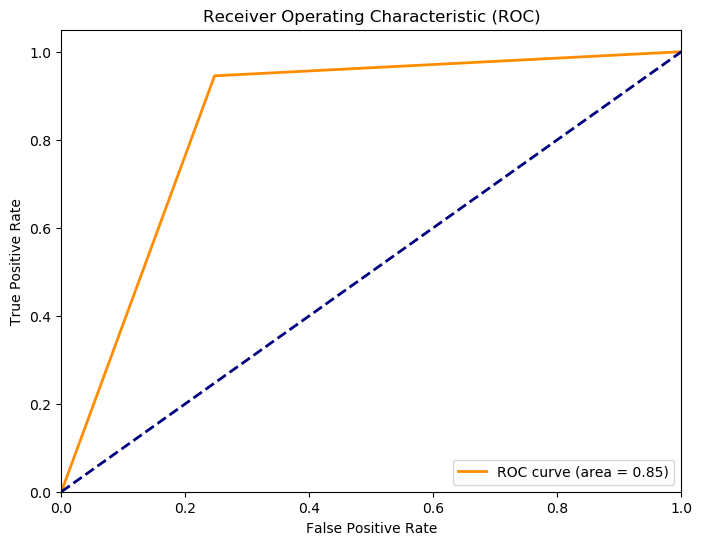

AUC: 0.849


In [22]:
y_pred = predicted

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Now you can use roc_auc for further analysis or reporting
print('AUC: %.3f' % roc_auc)

In [23]:
modelDT = DecisionTreeClassifier(max_depth=5)
modelDT.fit(X_train, y_train)
predicted = modelDT.predict(X_test)
acc_scoreDecisionTree = accuracy_score(y_test, predicted)
p=precision_score(y_test, predicted) 
r=recall_score(y_test, predicted) 
f1=f1_score(y_test, predicted) 
print('Accuracy : %.3f' % (acc_scoreDecisionTree))
print('Precision : %.3f' % (p))
print('Recall : %.3f' % (r))
print('F1-score: %.3f' % (f1))
new_row = {'Method': 'DT_Alone_RF_'+modelChie, 'Accuracy': acc_scoreDecisionTree, 'Precision': p, 'Recall': r, 'F1-score': f1}
dfOutputExcel.loc[len(dfOutputExcel)] = new_row 

Accuracy : 0.779
Precision : 0.796
Recall : 0.910
F1-score: 0.849


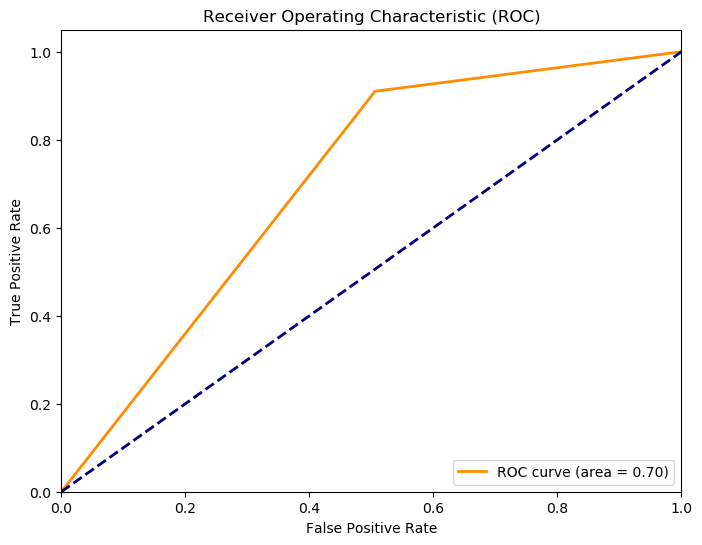

AUC: 0.702


In [24]:
y_pred = predicted

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Now you can use roc_auc for further analysis or reporting
print('AUC: %.3f' % roc_auc)

In [25]:
#MLP model
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
predicted = mlp.predict(X_test)
acc_score_MLP = accuracy_score(y_test, predicted)
p=precision_score(y_test, predicted) 
r=recall_score(y_test, predicted) 
f1=f1_score(y_test, predicted) 
print('Accuracy : %.3f' % (acc_score_MLP))
print('Precision : %.3f' % (p))
print('Recall : %.3f' % (r))
print('F1-score: %.3f' % (f1))
new_row = {'Method': 'MLP_Alone_RF_'+modelChie, 'Accuracy': acc_score_MLP, 'Precision': p, 'Recall': r, 'F1-score': f1}
dfOutputExcel.loc[len(dfOutputExcel)] = new_row 

Accuracy : 0.883
Precision : 0.928
Recall : 0.900
F1-score: 0.913


/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


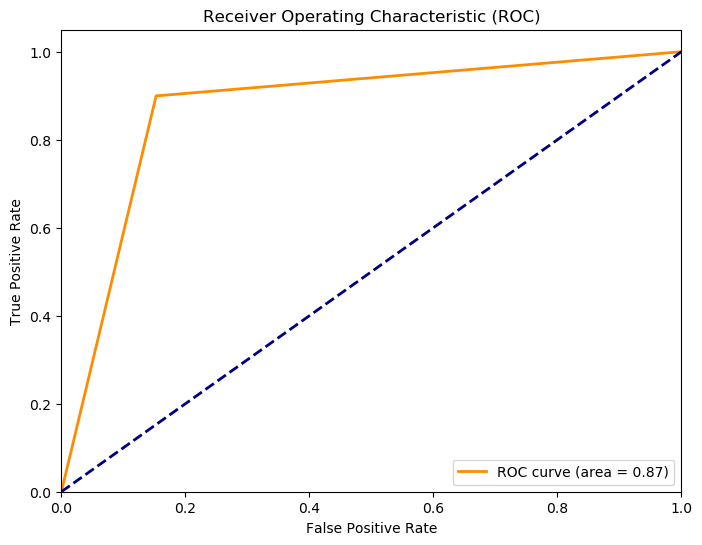

AUC: 0.873


In [26]:
y_pred = predicted

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Now you can use roc_auc for further analysis or reporting
print('AUC: %.3f' % roc_auc)

In [27]:
modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)
predicted = modelRF.predict(X_test)
acc_scoreRandomForest = accuracy_score(y_test, predicted)
p=precision_score(y_test, predicted) 
r=recall_score(y_test, predicted) 
f1=f1_score(y_test, predicted) 
print('Accuracy : %.3f' % (acc_scoreRandomForest))
print('Precision : %.3f' % (p))
print('Recall : %.3f' % (r))
print('F1-score: %.3f' % (f1))
new_row = {'Method': 'RF_Alone_RF_'+modelChie, 'Accuracy': acc_scoreRandomForest, 'Precision': p, 'Recall': r, 'F1-score': f1}
dfOutputExcel.loc[len(dfOutputExcel)] = new_row 

Accuracy : 0.858
Precision : 0.853
Recall : 0.958
F1-score: 0.902


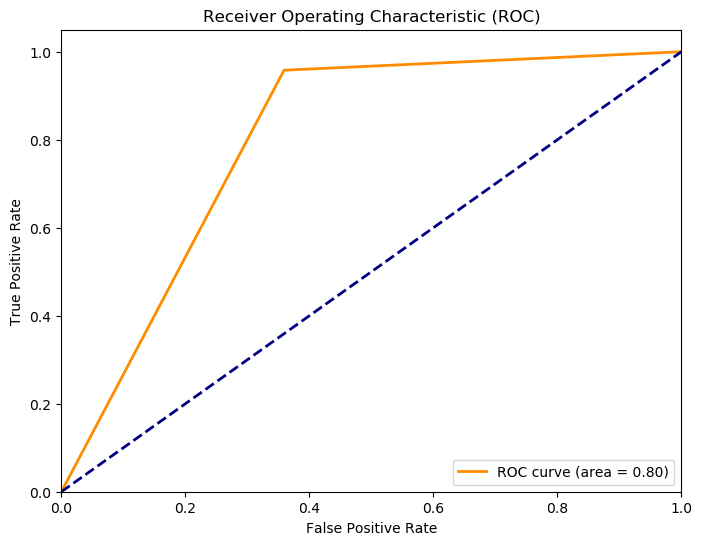

AUC: 0.799


In [28]:
y_pred = predicted

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Now you can use roc_auc for further analysis or reporting
print('AUC: %.3f' % roc_auc)

In [29]:
modelNB = GaussianNB()
modelNB.fit(X_train, y_train)
predicted = modelNB.predict(X_test)
acc_scoreGaussianNaiveBayes = accuracy_score(y_test, predicted)
p=precision_score(y_test, predicted) 
r=recall_score(y_test, predicted) 
f1=f1_score(y_test, predicted) 
print('Accuracy : %.3f' % (acc_scoreGaussianNaiveBayes))
print('Precision : %.3f' % (p))
print('Recall : %.3f' % (r))
print('F1-score: %.3f' % (f1))
new_row = {'Method': 'NB_Alone_RF_'+modelChie, 'Accuracy': acc_scoreGaussianNaiveBayes, 'Precision': p, 'Recall': r, 'F1-score': f1}
dfOutputExcel.loc[len(dfOutputExcel)] = new_row 

Accuracy : 0.724
Precision : 0.837
Recall : 0.743
F1-score: 0.787


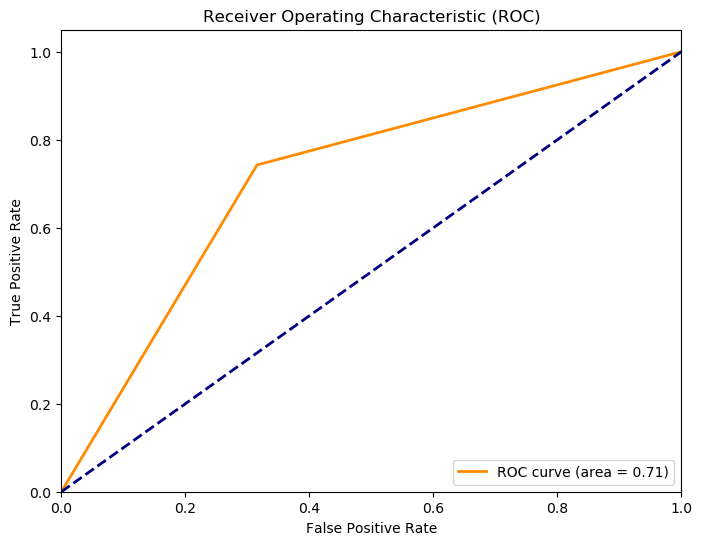

AUC: 0.714


In [30]:
y_pred = predicted

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Now you can use roc_auc for further analysis or reporting
print('AUC: %.3f' % roc_auc)